#Linear Regression Algorithm (Completed September, 2018):

The aim of this project will be to understand the concept of linear regression and demonstrate this through code. Specifically, I will use the mean squared error loss function as well as apply a basic gradient descent function from scratch. I acknowledge the simplicity of my linear regression code but adding "extra features" (such as toggling normalisation on and off, fitting intercepts etc.) are beyond the objectives of this exercise.

To validate that my code works, I will apply my regression algorithm on two datasets (Advertising and IRIS) and compare the optimised weights given by the scikitlearn linear regression algorithm. If they are similar, then it is enough for me to assume that my algorithm is correct and functional.

Key achievements from this project:
1. Understanding linear regression using one variable.
2. Understanding linear regression using multiple variables.
3. Understanding of loss functions.
3. Coding a gradient descent function from scratch.
4. Writing a linear regression algorithm from scratch.

In [49]:
#import libraries

import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

['Unnamed: 0' 'TV' 'radio' 'newspaper' 'sales']


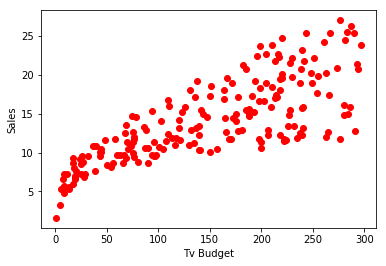

0.047536640433019736 7.0325935491276965


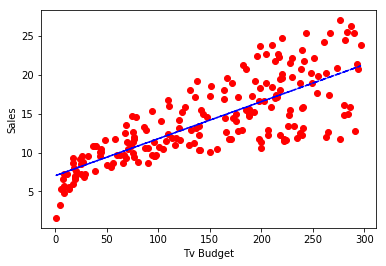

In [50]:
#Linear Regression with 1 variable

# load data in csv file
budget = []
sales = []

data = pd.read_csv("C:\\Users\\Harrison\\Documents\\Machine Learning from Scratch\\Advertising.csv")
data.dtypes
budget = data.iloc[:,1:-1]
sales = data.iloc[:,-1]
print(data.columns.values)

# Visualize the data
feature_number = 0
X_axis = budget.iloc[:,feature_number]
X_axis_label = budget.columns.values[feature_number]
plt.plot(X_axis,sales,'ro')
plt.xlabel(X_axis_label.title() + ' Budget')
plt.ylabel('Sales')
plt.show()

#now let's compute the weights for a linear regression model using the TV budget only
X = X_axis
Y = sales
x_mean = np.average(X)
y_mean = np.average(Y)
#calculate the coefficient of the given variable. The formula used to do so can be derived through the 
#differentiation of the Residual Sum of Squares equation.
w_0 = np.sum((X - x_mean)*(Y - y_mean))/np.sum((X - x_mean)**2) 
#simultaneous equations to fit the intercept
w_1 = y_mean - w_0*x_mean

print(w_0, w_1)
pred_y = w_0*X + w_1
plt.plot(X_axis,sales,'ro', X_axis, pred_y, 'b--')
plt.xlabel(X_axis_label.title() + ' Budget')
plt.ylabel('Sales')
plt.show()

In [51]:
#functions for a linear regression using multiple variables from scratch
#my linear regression assumes an intercept is desired.

def normalise(features):
    normalised_features = pd.DataFrame()
    features = pd.DataFrame(features)
    for i in range(0, features.shape[1]):
        z = (features.iloc[:,i] - np.min(features.iloc[:,i])) / (np.max(features.iloc[:,i]) - np.min(features.iloc[:,i]))
        normalised_features = pd.concat([normalised_features, z], axis = 1)
    return normalised_features

#the cost function used will be mean squared error
def cost_function(X, Y, weights):
        cost = np.sum((Y - np.dot(X, weights))**2)/2*len(X)
        return cost

def gradient_descent(X, Y, weights, alpha, iterations):
    #set up cost history
    cost_history = []
    for iter in range(0,iterations):
        #loss function
        loss = np.dot(X, weights) - Y
        #adjust gradient - the dot product facilitates the partial differentiation all at once (as required). 
        #The loss is there because when you partially differentiate the cost function with respect to 
        #the weight, it stays the same so its easier to calculate it as loss first.
        gradient = X.T.dot(loss)/len(X)
        #adjust weights
        weights = weights - alpha*gradient
        cost = cost_function(X, Y, weights)
        cost_history.append(cost)
    return weights, cost_history

def linear_regression(X, Y, learning_rate, iterations):
    X = pd.DataFrame(X)
    X = normalise(X)
    X0 = pd.DataFrame(np.ones(len(X)))
    X = pd.concat([X0, X], axis = 1)
    #initialise weights
    weights = np.zeros(X.shape[1])
    weights, cost_history = gradient_descent(X,Y, weights, learning_rate, iterations)
    return weights, cost_history

In [27]:
#run linear regression using my algorithm and compare results to scikitlearn's linear regression algorithm

data = pd.read_csv("C:\\Users\\Harrison\\Documents\\Machine Learning from Scratch\\Advertising.csv")
data.dtypes

budget = data.iloc[:,1:-1]
sales = data.iloc[:,-1]

weights, cost_history = linear_regression(budget, sales, 0.05, 5000)
print('Weights given by the linear regression from scratch:')
print(weights)

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

model = LinearRegression(normalize=False)
scaler = MinMaxScaler()
normalized_features = scaler.fit_transform(budget)
z = model.fit(normalized_features, sales)

print('\nWeights given by the linear regression from scikitlearn:')
print('Intercept: ' + str(z.intercept_))
print('Coefficients: ' + str(z.coef_))
 

Weights given by the linear regression from scratch:
0             2.970366
TV           13.532610
radio         9.350479
newspaper    -0.115990
dtype: float64

Weights given by the linear regression from scikitlearn:
Intercept: 2.9706133733654507
Coefficients: [13.53260566  9.35108884 -0.11796296]


In [28]:
#apply the algorithm on another dataset and compare the weights

#load iris dataset
from sklearn import datasets

iris = datasets.load_iris()

#put into dataframes
iris_data = pd.DataFrame(iris.data)
iris_data.columns = iris.feature_names
labels = pd.DataFrame(iris.target)
normalised_col_names = ['sepal length', 'sepal width', 'petal length', 'petal width']

features = iris_data.iloc[:,0:-1]

target = iris_data.iloc[:,-1]

weights, cost_history = linear_regression(features, target, 0.03, 30000)
print('Weights given by the linear regression from scratch:')
print(weights)

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

model = LinearRegression(normalize=False)
scaler = MinMaxScaler()
normalized_features = scaler.fit_transform(features)
z = model.fit(normalized_features, target)

print('\nWeights given by the linear regression from scikitlearn:')
print('Intercept: ' + str(z.intercept_))
print('Coefficients: ' + str(z.coef_))

Weights given by the linear regression from scratch:
0                   -0.162094
sepal length (cm)   -0.723083
sepal width (cm)     0.530652
petal length (cm)    3.074907
dtype: float64

Weights given by the linear regression from scikitlearn:
Intercept: -0.16924769206769552
Coefficients: [-0.75697678  0.54906531  3.10392026]


Given the (almost) similar weights given by both linear regression algorithms on both datasets, I am confident I have replicated a functional linear regression algorithm and demonstrated its key fundamental concepts. In my few next projects, I aspire to enhance my gradient descent algorithm and further utilise different loss functions.